In [1]:
!pip install pandas-profiling==3.3.0

In [4]:
!pip install --upgrade numba==0.58.1 visions==0.7.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 MB 13.6 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.43.0
    Uninstalling llvmlite-0.43.0:
      Successfully uninstalled llvmlite-0.43.0
  Attempting uninstall: numba
    Found existing installation: numba 0.60.0
    Uninstalling numba-0.60.0:
      Successfully uninstalled numba-0.60.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.4.4 which is incompatible.


In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/usr/local/lib/python3.10/dist-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [3]:
df = pd.read_csv("data.csv", encoding='latin-1') # or encoding='cp1252'
display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Algumas novas observações sobre os dados

- Temos linhas com valores negativos na coluna "quantity".
- Temos linhas com valores "0" em UnitPrice.
- Temos muitas linhas (25% dos dados) faltando (NaN) na coluna Costumer ID.
- Temos 4879 linhas duplicadas, conforme o relatório do Pandas Profiling.
- Temos 1454 linhas faltando na coluna "Description".

Também temos os formatos dos dados:
- InvoiceNo = categorical
- StockCode = categorical
- Description = Categorical
- Quantity = Número Real
- InvoicDate = Categorical
- UnitPrice = Número Real
- CostumerID = Número Real
- Country = Categorical

# Raciocínios

- Valores negativos em quantity podem ser erro de digitação e preciso ou remover, ou alterar esses dados. Se não forem erros de digitação e eu alterar esses dados, vou alterar em muito o resultado das análises. Acho mais seguro remover.
- Valores zero em unitprice podem significar brindes. Não vou excluir esses valores porque não vão alterar o cálculo de valor monetário ou frequência.
- Ausência de 25% dos dados de costumerID é muito prejudicial. Não há possibilidade de encontrar o id do cliente de outra forma, então só me resta apagar as linhas com valores faltantes nessa coluna já que isso torna os dados alí inúteis.
- Linhas duplicadas podem também ser erros de digitação. Seria uma possibilidade considerar elas várias "ordens" de pedidos para cada compra. Mas qual a chance disso acontecer? Deixar esses dados duplicados pode alterar muito a análise. Logo, acho melhor remover as duplicatas.
- A coluna description não é relevante para a análise, ainda mais considerando que temos os códigos de estoque para cada produto. Posso excluir ela.
- Preciso alterar os tipos de dados de cada coluna.

# Conclusões

1. Valores Negativos em "Quantity":
- Possíveis retornos o cancelamentos.
  Depois de analisar melhor, percebi que os valores em que quantidades eram negativas estavam associadas a códigos de faturamento começando com C, o que me fez pensar que são devoluções e cancelamentos.
  Conclusão: Vou manter os registros negativos, ajustar o valor monetario e subtraindo o valor das devoluções do total gasto pelo cliente.
2. Valores Zero em UnitPrice:
- Possíveis brindes ou erros.
  Se forem brindes associados a compras, vale a pena deixar. Mas analisando alguns códigos de faturamento, não necessariamente estavam relacionados a uma compra. Mantê-los pode distorcer a média da análise monetária e a frequência, caso seja um brinde que não esteja relacionada a uma compra.
  Conclusão: Pode ser mais seguro remover esses dados.
3. Ausência de 25% dos dados de CostumerID
- Não temos o que fazer, vamos excluir as linhas sem identificação do cliente.
4. Linhas duplicadas
- Remover as linhas duplicadas.
5. Coluna description
- Pode ser útil em análises futuras, mas para o que tenho idealizado não aparenta ser útil. Vou remover.
6. Alterar os tipos de dados.

In [12]:
df_original = df.copy()

In [13]:
# Contar o número de linhas com UnitPrice igual a zero
num_zero_unitprice = (df['UnitPrice'] == 0).sum()
print(f"Número de linhas com UnitPrice igual a zero: {num_zero_unitprice}")


Número de linhas com UnitPrice igual a zero: 0


In [14]:
# Manter apenas as linhas onde UnitPrice é maior que zero
df = df[df['UnitPrice'] > 0]


In [15]:
# Verificar se ainda existem linhas com UnitPrice igual a zero
if (df['UnitPrice'] == 0).any():
    print("Ainda existem linhas com UnitPrice igual a zero.")
else:
    print("Todas as linhas com UnitPrice igual a zero foram removidas.")


Todas as linhas com UnitPrice igual a zero foram removidas.


In [18]:
# Contar o número de registros com CustomerID ausente
num_missing_customerid = df['CustomerID'].isna().sum()
print(f"Número de registros com CustomerID ausente: {num_missing_customerid}")


Número de registros com CustomerID ausente: 132603


In [21]:
df = df.dropna(subset=['CustomerID'])
# Resetar o índice do DataFrame
df = df.reset_index(drop=True)


# Verificar se ainda existem registros com CustomerID ausente
if df['CustomerID'].isna().any():
    print("Ainda existem registros com CustomerID ausente.")
else:
    print("Todos os registros com CustomerID ausente foram removidos.")


Todos os registros com CustomerID ausente foram removidos.


In [57]:
# Verificar o número de linhas duplicadas
num_duplicated = df.duplicated().sum()
print(f"Número de linhas duplicadas: {num_duplicated}")

Número de linhas duplicadas: 0


In [58]:
# Identificar todas as linhas duplicadas considerando todas as colunas
duplicated_rows = df[df.duplicated(keep=False)].sort_values(by="StockCode", ascending=True)

# Exibir as primeiras 10 duplicatas
print(duplicated_rows.head(10))

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [59]:
# Remover as linhas duplicadas
df = df.drop_duplicates()

# Resetar o índice do DataFrame
df = df.reset_index(drop=True)

# Verificar novamente o número de linhas duplicadas
num_duplicated_after = df.duplicated().sum()
print(f"Número de linhas duplicadas após remoção: {num_duplicated_after}")


Número de linhas duplicadas após remoção: 0


In [61]:
# Convertendo tipos de dados

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df['StockCode'] = df['StockCode'].astype(str)
df['Quantity'] = df['Quantity'].astype(int)
df['CustomerID'] = df['CustomerID'].astype(int)
df['UnitPrice'] = df['UnitPrice'].astype(float)
df['Country'] = df['Country'].astype(str)

print(df.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object


In [63]:
# Criando coluna TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Exibir estatísticas descritivas de 'TotalPrice'
print(df['TotalPrice'].describe())


count    401564.000000
mean         20.615691
std         430.373603
min     -168469.600000
25%           4.250000
50%          11.700000
75%          19.800000
max      168469.600000
Name: TotalPrice, dtype: float64


Observamos valores mínimos e máximos muito distantes, podendo ser indicativo de outliers.

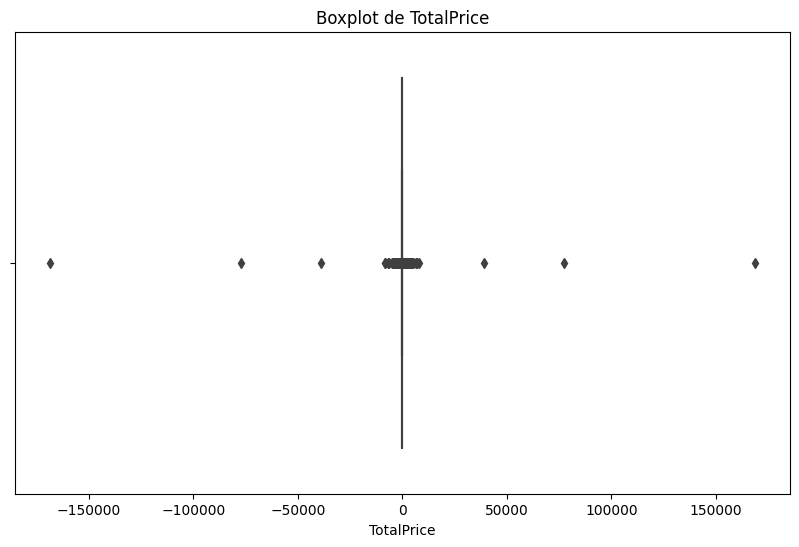

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['TotalPrice'])
plt.title('Boxplot de TotalPrice')
plt.show()


In [84]:
# Realmente temos 3 outliers positivos e negativos. Vamos visualizá-los

# Definir um limite superior baseado no percentil 99
limite_superior = df['TotalPrice'].quantile(0.99)
# Exibir registros com TotalPrice acima do limite superior
high_totalprice = df[df['TotalPrice'] > limite_superior].groupby('InvoiceNo').agg({'TotalPrice': 'sum'}).reset_index().sort_values("InvoiceNo", ascending=True)
print(high_totalprice.head(30))


   InvoiceNo  TotalPrice
0     536371      204.00
1     536374      350.40
2     536387     3193.92
3     536397      223.20
4     536405      326.40
5     536437      456.08
6     536477     1627.20
7     536531      204.00
8     536560      204.00
9     536575      862.20
10    536576     1470.00
11    536579      228.96
12    536581      330.00
13    536584     1132.80
14    536595      203.40
15    536616      244.08
16    536617      471.60
17    536735      211.20
18    536736      466.56
19    536783     2064.30
20    536784     1204.50
21    536785     2480.96
22    536786      204.00
23    536809     1003.20
24    536810      303.96
25    536811      527.85
26    536824      408.00
27    536830     2002.40
28    536835      295.00
29    536848      204.00


In [85]:
# Definir um limite inferior baseado no percentil 1
limite_inferior = df['TotalPrice'].quantile(0.01)

# Exibir registros com TotalPrice abaixo do limite inferior
low_totalprice = df[df['TotalPrice'] < limite_inferior].groupby('InvoiceNo').agg({'TotalPrice': 'sum'}).reset_index().sort_values("InvoiceNo", ascending=True)
print(low_totalprice.head(30))


   InvoiceNo  TotalPrice
0    C536379      -27.50
1    C536391     -120.60
2    C536506      -25.50
3    C536548      -71.95
4    C536622      -17.00
5    C536625      -29.90
6    C536734      -17.00
7    C536757     -280.80
8    C536807      -19.90
9    C536812     -883.08
10   C536814     -102.45
11   C536816      -13.90
12   C536820      -10.95
13   C536822      -33.90
14   C536826      -13.95
15   C536827      -20.85
16   C536828      -10.75
17   C536850    -1192.20
18   C536855      -31.80
19   C536978       -9.95
20   C537024      -75.60
21   C537043      -11.70
22   C537132     -274.75
23   C537157      -30.00
24   C537164      -29.29
25   C537203       -9.95
26   C537232      -17.00
27   C537234      -39.00
28   C537314      -27.00
29   C537333      -34.00


# Outliers
A existência de outliers simétricos me fez pensar que foram pedidos feitos equivocadamente e posterior cancelamento.

Mas ao fazer a contagem das quantidades canceladas e quantidades pedidas, bem como os valores dos pedidos feitos e cancelados, vi que são valores diferenteS, o que me levou a crer que a simetria dos outliers positivos e negativos foi uma estranha coincidência.

Considerando isso, também tive que levar em consideração que grandes compras e cancelamentos são relevantes para as análises.

Por isso, resolvi deixar os outliers, incluir os cancelamentos e ajustar as métricas.

In [79]:
# Marcar transações de cancelamento
df['IsCancellation'] = df['InvoiceNo'].str.startswith('C')

# Calcular o valor monetário líquido por cliente
monetary = df.groupby('CustomerID').agg({
    'TotalPrice': lambda x: x[df['IsCancellation'] == False].sum() + x[df['IsCancellation'] == True].sum()
}).reset_index()
monetary.rename(columns={'TotalPrice': 'Monetary'}, inplace=True)


In [92]:
df.sort_values("TotalPrice", ascending=True).head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,IsCancellation
401092,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom,-168469.60,True
37510,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,-77183.60,True
157393,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098,United Kingdom,-38970.00,True
312771,C573079,M,Manual,-2,2011-10-27 14:15:00,4161.06,12536,France,-8322.12,True
119798,C551685,POST,POSTAGE,-1,2011-05-03 12:51:00,8142.75,16029,United Kingdom,-8142.75,True
119905,C551699,M,Manual,-1,2011-05-03 14:12:00,6930.00,16029,United Kingdom,-6930.00,True
110938,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749,United Kingdom,-6539.40,True
110936,C550456,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1930,2011-04-18 13:08:00,2.55,15749,United Kingdom,-4921.50,True
110934,C550456,48185,DOORMAT FAIRY CAKE,-670,2011-04-18 13:08:00,6.75,15749,United Kingdom,-4522.50,True
189310,C560372,M,Manual,-1,2011-07-18 12:26:00,4287.63,17448,United Kingdom,-4287.63,True


In [93]:
df.sort_values("TotalPrice", ascending=False).head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,IsCancellation
401091,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.60,False
37505,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.60,False
157392,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.00,False
119896,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75,False
251979,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450,United Kingdom,7144.72,False
111003,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749,United Kingdom,6539.40,False
33104,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749,United Kingdom,6539.40,False
312007,573003,23084,RABBIT NIGHT LIGHT,2400,2011-10-27 12:11:00,2.08,14646,Netherlands,4992.00,False
33102,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749,United Kingdom,4921.50,False
110999,550461,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-04-18 13:20:00,2.40,15749,United Kingdom,4632.00,False


In [103]:
# Ordenar o DataFrame por 'CustomerID' e 'InvoiceDate'
df = df.sort_values(by=['CustomerID', 'InvoiceDate'])

In [120]:
# Criar uma chave única combinando colunas relevantes
df['Key'] = df['CustomerID'].astype(str) + '_' + \
            df['UnitPrice'].astype(str) + '_' + \
            df['InvoiceDate'].dt.strftime('%Y-%m-%d').astype(str)


In [121]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,IsCancellation,Key
37505,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6,False,12346_1.04_2011-01-18
37510,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,-77183.6,True,12346_1.04_2011-01-18
10407,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347,Iceland,25.2,False,12347_2.1_2010-12-07
10408,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347,Iceland,17.0,False,12347_4.25_2010-12-07
10409,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347,Iceland,39.0,False,12347_3.25_2010-12-07


In [122]:
# Agrupar por Key e somar Quantity e TotalPrice
grouped = df.groupby('Key').agg({
    'Quantity': 'sum',
    'TotalPrice': 'sum',
    'CustomerID': 'first',
    'UnitPrice': 'first',
    'InvoiceDate': 'first'
}).reset_index()

In [127]:
# Identificar chaves onde a soma de TotalPrice é zero
keys_to_remove = grouped[grouped['TotalPrice'] == 0]['Key']



In [128]:
# Remover registros com as chaves identificadas
df_cleaned = df[~df['Key'].isin(keys_to_remove)].reset_index(drop=True)


In [140]:
df_cleaned.sort_values("TotalPrice", ascending=True).head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,IsCancellation,Key
197866,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098,United Kingdom,-38970.00,True,15098_38970.0_2011-06-10
254666,C551699,M,Manual,-1,2011-05-03 14:12:00,6930.00,16029,United Kingdom,-6930.00,True,16029_6930.0_2011-05-03
237503,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749,United Kingdom,-6539.40,True,15749_2.1_2011-04-18
237501,C550456,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1930,2011-04-18 13:08:00,2.55,15749,United Kingdom,-4921.50,True,15749_2.55_2011-04-18
237499,C550456,48185,DOORMAT FAIRY CAKE,-670,2011-04-18 13:08:00,6.75,15749,United Kingdom,-4522.50,True,15749_6.75_2011-04-18
341910,C560372,M,Manual,-1,2011-07-18 12:26:00,4287.63,17448,United Kingdom,-4287.63,True,17448_4287.63_2011-07-18
342442,C567527,23113,PANTRY CHOPPING BOARD,-756,2011-09-21 09:16:00,5.06,17450,United Kingdom,-3825.36,True,17450_5.06_2011-09-21
237502,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749,United Kingdom,-3700.00,True,15749_1.85_2011-04-18
237500,C550456,47566B,TEA TIME PARTY BUNTING,-1300,2011-04-18 13:08:00,2.55,15749,United Kingdom,-3315.00,True,15749_2.55_2011-04-18
220998,C562647,M,Manual,-1,2011-08-08 12:56:00,3155.95,15502,United Kingdom,-3155.95,True,15502_3155.95_2011-08-08


In [141]:
df_cleaned.sort_values("TotalPrice", ascending=False).head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,IsCancellation,Key
197865,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.00,False,15098_649.5_2011-06-10
342431,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450,United Kingdom,7144.72,False,17450_5.06_2011-09-20
237496,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749,United Kingdom,6539.40,False,15749_2.1_2011-01-11
237508,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749,United Kingdom,6539.40,False,15749_2.1_2011-04-18
159497,573003,23084,RABBIT NIGHT LIGHT,2400,2011-10-27 12:11:00,2.08,14646,Netherlands,4992.00,False,14646_2.08_2011-10-27
237494,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749,United Kingdom,4921.50,False,15749_2.55_2011-01-11
237504,550461,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-04-18 13:20:00,2.40,15749,United Kingdom,4632.00,False,15749_2.4_2011-04-18
237498,540818,48185,DOORMAT FAIRY CAKE,670,2011-01-11 12:57:00,6.75,15749,United Kingdom,4522.50,False,15749_6.75_2011-01-11
382328,558526,23173,REGENCY TEAPOT ROSES,540,2011-06-30 11:01:00,8.15,17949,United Kingdom,4401.00,False,17949_8.15_2011-06-30
237506,550461,48185,DOORMAT FAIRY CAKE,670,2011-04-18 13:20:00,6.35,15749,United Kingdom,4254.50,False,15749_6.35_2011-04-18


In [142]:
# Verificar os índices do DataFrame
print(df_cleaned.index)
print(df_cleaned.index.dtype)


RangeIndex(start=0, stop=400505, step=1)
int64


In [143]:
# Removendo Cancelamentos Restantes

df_cleaned.drop([197866, 197865, 237503, 237508, 237501, 237494, 237498, 237499], axis=0, inplace=True)

In [145]:
df_cleaned.sort_values("TotalPrice", ascending=False).head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,IsCancellation,Key
342431,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450,United Kingdom,7144.72,False,17450_5.06_2011-09-20
237496,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749,United Kingdom,6539.40,False,15749_2.1_2011-01-11
159497,573003,23084,RABBIT NIGHT LIGHT,2400,2011-10-27 12:11:00,2.08,14646,Netherlands,4992.00,False,14646_2.08_2011-10-27
237504,550461,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-04-18 13:20:00,2.40,15749,United Kingdom,4632.00,False,15749_2.4_2011-04-18
382328,558526,23173,REGENCY TEAPOT ROSES,540,2011-06-30 11:01:00,8.15,17949,United Kingdom,4401.00,False,17949_8.15_2011-06-30
237506,550461,48185,DOORMAT FAIRY CAKE,670,2011-04-18 13:20:00,6.35,15749,United Kingdom,4254.50,False,15749_6.35_2011-04-18
42580,562439,84879,ASSORTED COLOUR BIRD ORNAMENT,2880,2011-08-04 18:06:00,1.45,12931,United Kingdom,4176.00,False,12931_1.45_2011-08-04
342195,540689,22470,HEART OF WICKER LARGE,1284,2011-01-11 08:43:00,3.21,17450,United Kingdom,4121.64,False,17450_3.21_2011-01-11
203309,581115,22413,METAL SIGN TAKE IT OR LEAVE IT,1404,2011-12-07 12:20:00,2.75,15195,United Kingdom,3861.00,False,15195_2.75_2011-12-07
389684,537659,21623,VINTAGE UNION JACK MEMOBOARD,600,2010-12-07 16:43:00,6.38,18102,United Kingdom,3828.00,False,18102_6.38_2010-12-07


In [146]:
df_cleaned['TotalPrice'].describe()

,TotalPrice
count,400497.000000
mean,20.670615
std,72.740686
min,-6930.000000
25%,4.250000
50%,11.700000
75%,19.800000
max,7144.720000


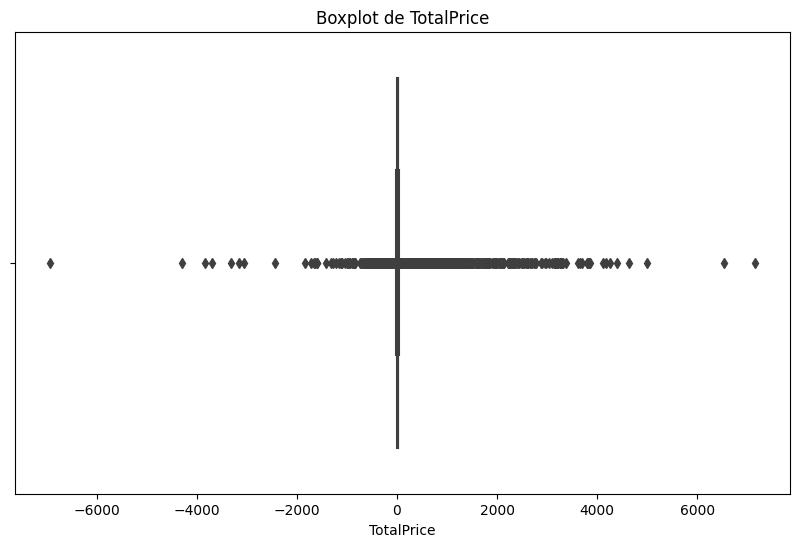

In [147]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['TotalPrice'])
plt.title('Boxplot de TotalPrice')
plt.show()


# Sobre outliers

Optei por não fazer o tratamento geral dos outliers com IQR por não querer remover registros legítimos de valores altos.

Existem novos valores outliers agora, o que é normal. Mas considerando a análise RFM, sendo valores legítimos, são válidos de permanecerem.

Com o novo boxplot conseguimos ter novas percepções, como exemplo, é visível que o número de cancelamentos, apesar de grande, tem uma proporção de aparente um terço em relação aos pedidos.

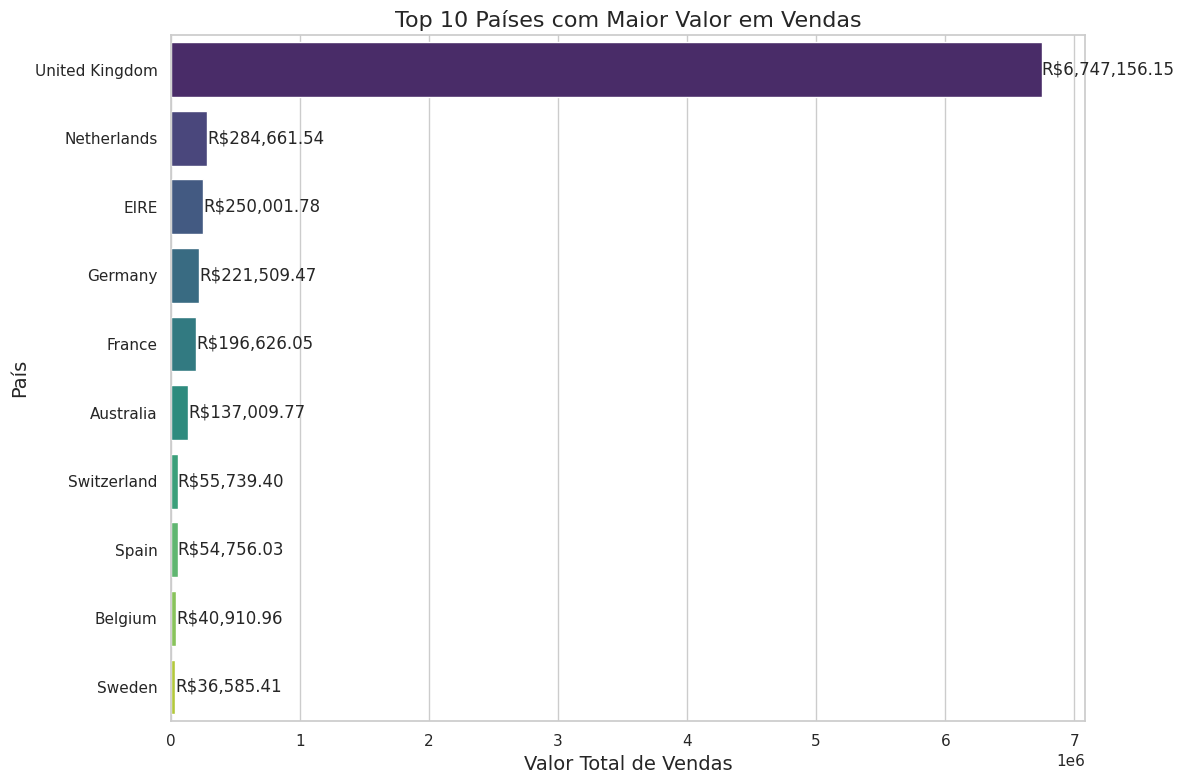

In [170]:
# Top 10 Países com Maior Valor em Vendas
# Agrupar por 'Country' e somar 'TotalPrice'
vendas_por_pais = df_cleaned.groupby('Country')['TotalPrice'].sum().reset_index()

# Ordenar de forma decrescente e selecionar os top 10
top10_paises = vendas_por_pais.sort_values(by='TotalPrice', ascending=False).head(10)

# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='TotalPrice', y='Country', data=top10_paises, palette='viridis')

# Adicionar títulos e rótulos
plt.title('Top 10 Países com Maior Valor em Vendas', fontsize=16)
plt.xlabel('Valor Total de Vendas', fontsize=14)
plt.ylabel('País', fontsize=14)

# Exibir os valores nas barras
for index, value in enumerate(top10_paises['TotalPrice']):
    plt.text(value, index, f'R${value:,.2f}', va='center')

plt.tight_layout()
plt.show()


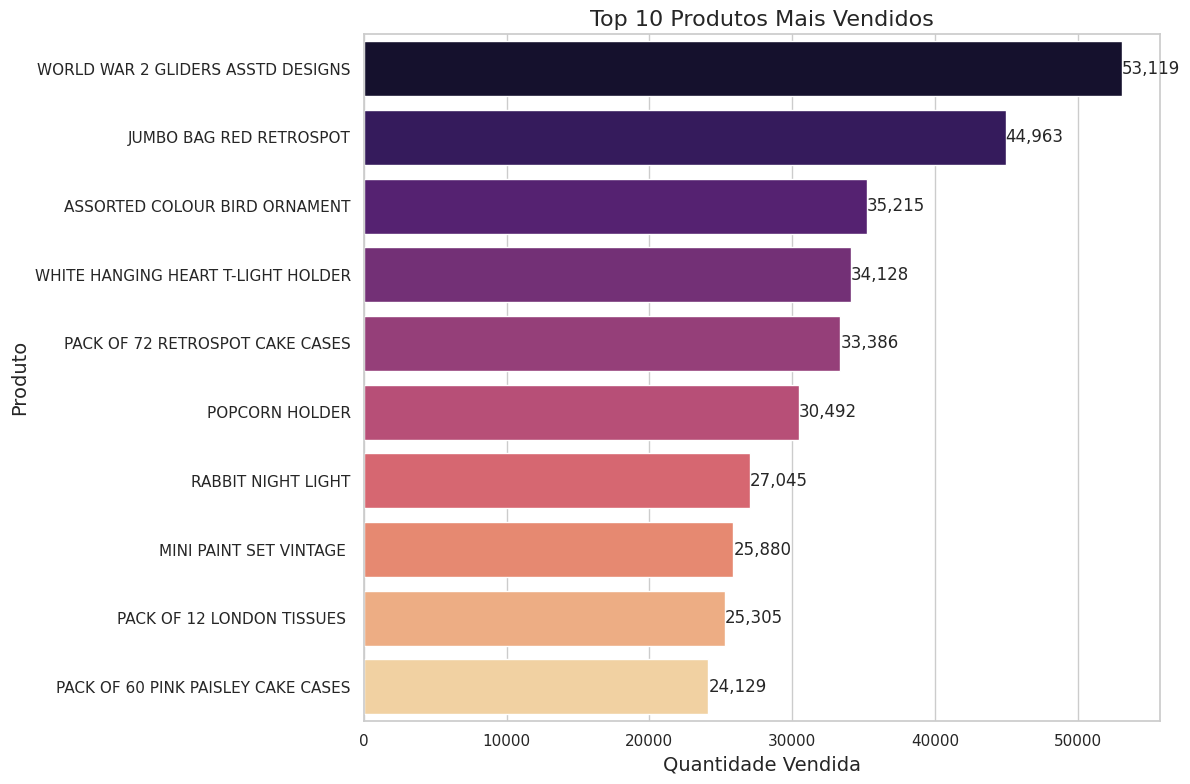

In [171]:
# Top 10 Produtos Mais Vendidos
# Agrupar por 'Description' e somar 'Quantity'
vendas_por_produto = df_cleaned.groupby('Description')['Quantity'].sum().reset_index()

# Ordenar de forma decrescente e selecionar os top 10
top10_produtos = vendas_por_produto.sort_values(by='Quantity', ascending=False).head(10)

# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='Quantity', y='Description', data=top10_produtos, palette='magma')

# Adicionar títulos e rótulos
plt.title('Top 10 Produtos Mais Vendidos', fontsize=16)
plt.xlabel('Quantidade Vendida', fontsize=14)
plt.ylabel('Produto', fontsize=14)

# Exibir os valores nas barras
for index, value in enumerate(top10_produtos['Quantity']):
    plt.text(value, index, f'{value:,}', va='center')

plt.tight_layout()
plt.show()


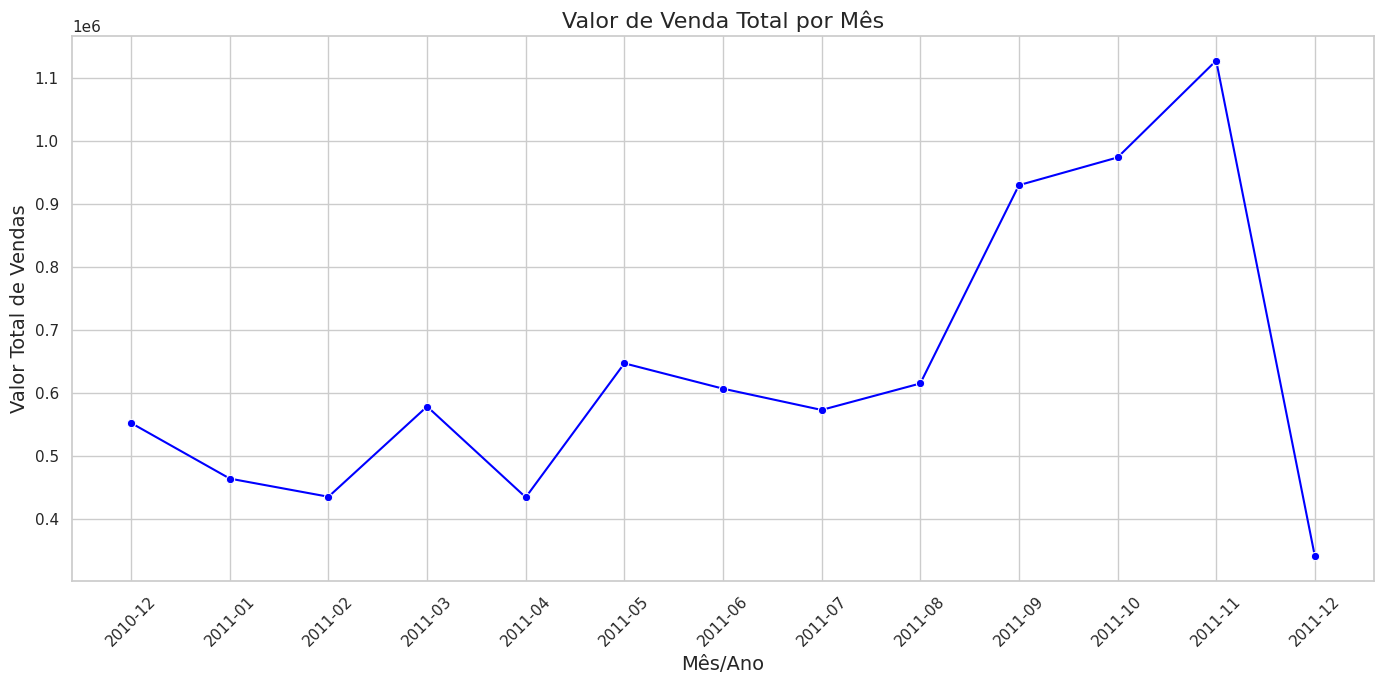

In [172]:
# Valor de Venda Total por Mês
# Certificar-se de que 'InvoiceDate' está em datetime
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Extrair mês e ano
df_cleaned['Ano_Mes'] = df_cleaned['InvoiceDate'].dt.to_period('M').astype(str)

# Agrupar por 'Ano_Mes' e somar 'TotalPrice'
vendas_por_mes = df_cleaned.groupby('Ano_Mes')['TotalPrice'].sum().reset_index()

# Ordenar cronologicamente
vendas_por_mes = vendas_por_mes.sort_values('Ano_Mes')

# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Criar o gráfico de linha
plt.figure(figsize=(14, 7))
sns.lineplot(x='Ano_Mes', y='TotalPrice', data=vendas_por_mes, marker='o', color='blue')

# Adicionar títulos e rótulos
plt.title('Valor de Venda Total por Mês', fontsize=16)
plt.xlabel('Mês/Ano', fontsize=14)
plt.ylabel('Valor Total de Vendas', fontsize=14)

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


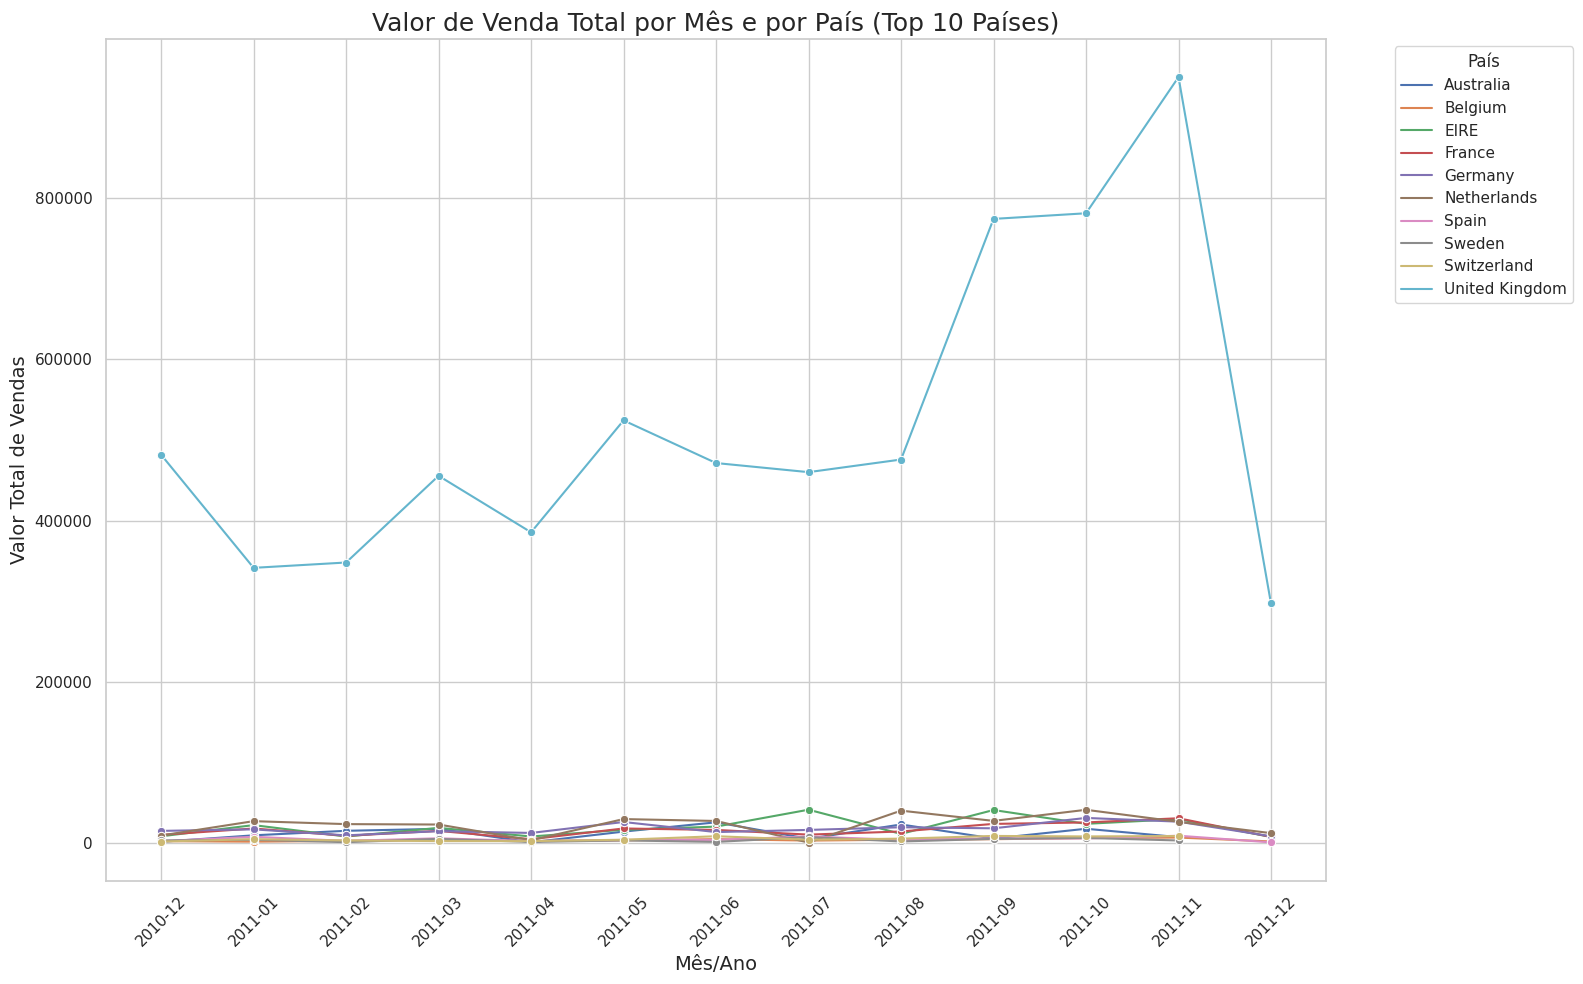

In [173]:
# Valor de Venda Total por Mês e por País (Top 10 Países)
# Supondo que 'top10_paises' já está definido a partir do gráfico 1

# Lista dos top 10 países
lista_top10_paises = top10_paises['Country'].tolist()

# Filtrar o DataFrame para incluir apenas os top 10 países
df_top10_paises = df_cleaned[df_cleaned['Country'].isin(lista_top10_paises)].copy()

# Extrair mês e ano
df_top10_paises['Ano_Mes'] = df_top10_paises['InvoiceDate'].dt.to_period('M').astype(str)

# Agrupar por 'Ano_Mes' e 'Country' e somar 'TotalPrice'
vendas_top10_mes_pais = df_top10_paises.groupby(['Ano_Mes', 'Country'])['TotalPrice'].sum().reset_index()

# Ordenar cronologicamente
vendas_top10_mes_pais = vendas_top10_mes_pais.sort_values('Ano_Mes')

# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Criar o gráfico de linhas múltiplas
plt.figure(figsize=(16, 10))
sns.lineplot(data=vendas_top10_mes_pais, x='Ano_Mes', y='TotalPrice', hue='Country', marker='o')

# Adicionar títulos e rótulos
plt.title('Valor de Venda Total por Mês e por País (Top 10 Países)', fontsize=18)
plt.xlabel('Mês/Ano', fontsize=14)
plt.ylabel('Valor Total de Vendas', fontsize=14)

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Melhorar a legenda
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


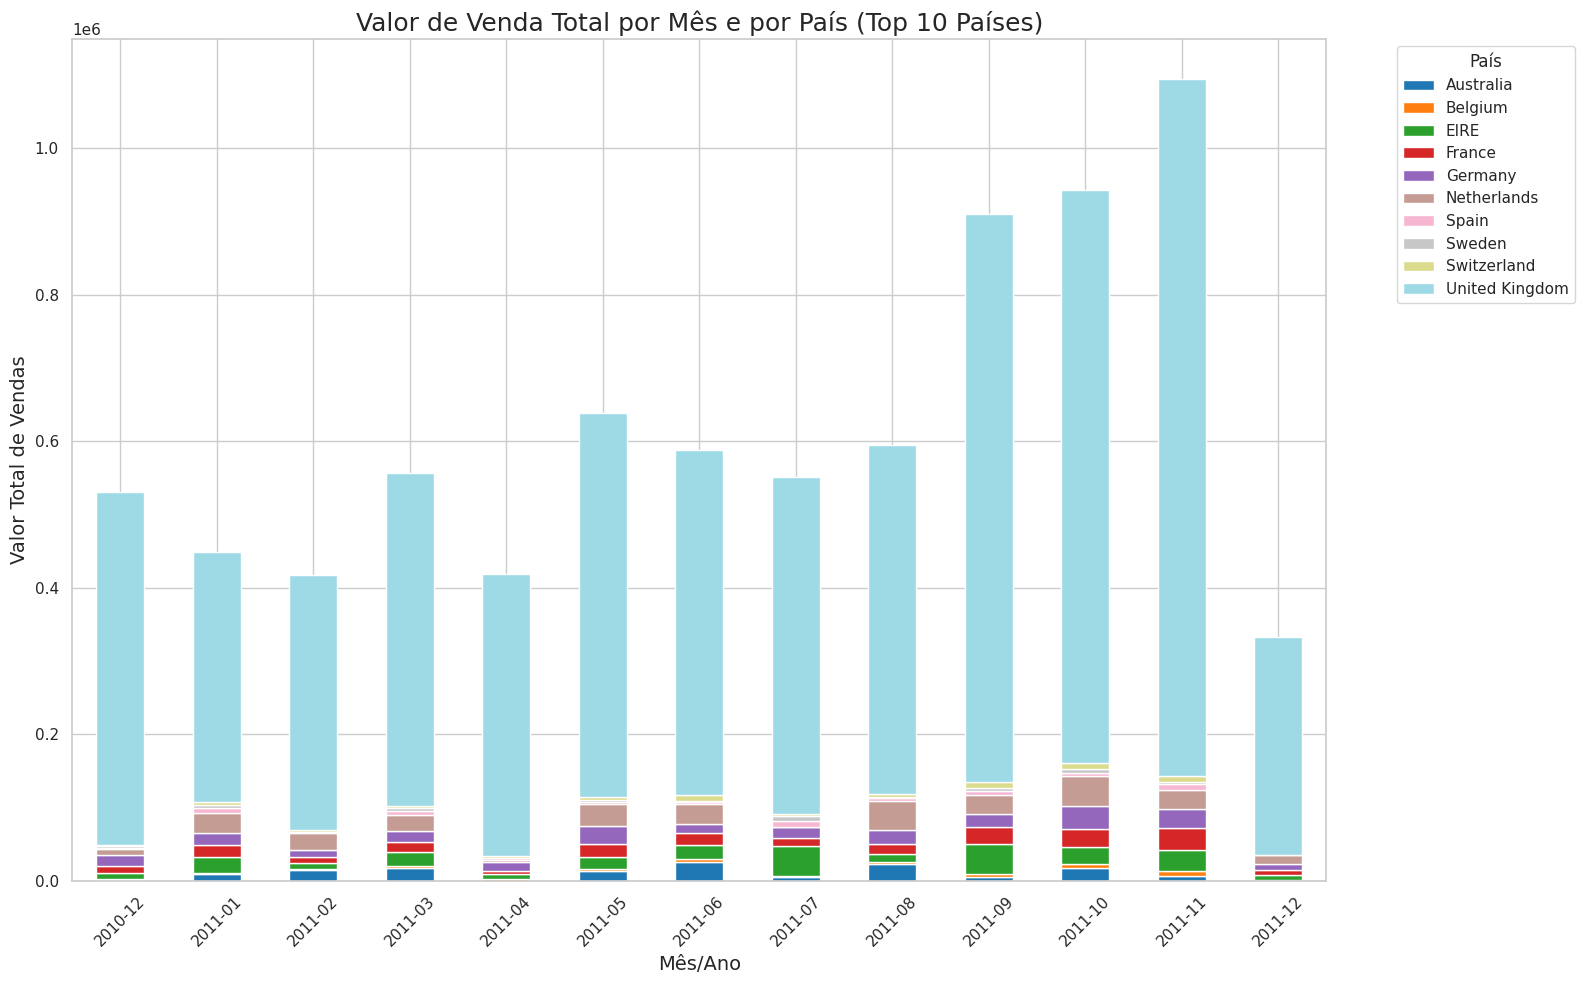

In [174]:
# Alternativa Gráfico de Barras Empilhadas
# Pivotar os dados para ter países como colunas
vendas_pivot = vendas_top10_mes_pais.pivot(index='Ano_Mes', columns='Country', values='TotalPrice').fillna(0)

# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Criar o gráfico de barras empilhadas
vendas_pivot.plot(kind='bar', stacked=True, figsize=(16, 10), colormap='tab20')

# Adicionar títulos e rótulos
plt.title('Valor de Venda Total por Mês e por País (Top 10 Países)', fontsize=18)
plt.xlabel('Mês/Ano', fontsize=14)
plt.ylabel('Valor Total de Vendas', fontsize=14)

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Melhorar a legenda
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [164]:
# Determinar a data máxima no conjunto de dados limpo
max_date = df_cleaned['InvoiceDate'].max()
print(f"Data máxima atualizada: {max_date}")

# Calcular Recência (R)
recency = df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (max_date - x.max()).days
}).reset_index()
recency.rename(columns={'InvoiceDate': 'Recency'}, inplace=True)

# Calcular Frequência (F) - Apenas compras efetivas
frequency = df_cleaned[~df_cleaned['IsCancellation']].groupby('CustomerID').agg({
    'InvoiceNo': 'nunique'
}).reset_index()
frequency.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

# Calcular Valor Monetário (M) - Compras menos cancelamentos
monetary = df_cleaned.groupby('CustomerID').agg({
    'TotalPrice': 'mean'
}).reset_index()
monetary.rename(columns={'TotalPrice': 'Monetary'}, inplace=True)

# Combinar as métricas RFM
rfm = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')

# Exibir as primeiras linhas do DataFrame RFM
print("Métricas RFM calculadas:")
print(rfm.head())


Data máxima atualizada: 2011-12-09 12:50:00
Métricas RFM calculadas:
   CustomerID  Recency  Frequency   Monetary
0       12347        1          7  23.681319
1       12348       74          4  57.975484
2       12349       18          1  24.076027
3       12350      309          1  19.670588
4       12352       35          7  20.605467


In [165]:
df_cleaned.groupby('CustomerID').mean('TotalPrice')

,Quantity,UnitPrice,TotalPrice,IsCancellation
CustomerID,,,,
12347,13.505495,2.644011,23.681319,0.000000
12348,75.516129,5.764839,57.975484,0.000000
12349,8.643836,8.289041,24.076027,0.000000
12350,11.588235,3.841176,19.670588,0.000000
12352,6.266667,6.628267,20.605467,0.000000
...,...,...,...,...
18280,4.500000,4.765000,18.060000,0.000000
18281,7.714286,5.622857,11.545714,0.000000
18282,7.538462,4.821538,13.584615,0.076923


In [166]:
# Exibir estatísticas descritivas das métricas RFM
print("Estatísticas descritivas das métricas RFM:")
print(rfm.describe())


Estatísticas descritivas das métricas RFM:
         CustomerID      Recency    Frequency     Monetary
count   4336.000000  4336.000000  4336.000000  4336.000000
mean   15300.404982    89.575876     4.252768    31.553114
std     1721.030863    99.188878     7.652290   109.248502
min    12347.000000     0.000000     1.000000  -150.473333
25%    13813.750000    16.000000     1.000000    11.419315
50%    15299.500000    49.000000     2.000000    17.035894
75%    16778.250000   138.000000     5.000000    23.723189
max    18287.000000   373.000000   208.000000  3861.000000


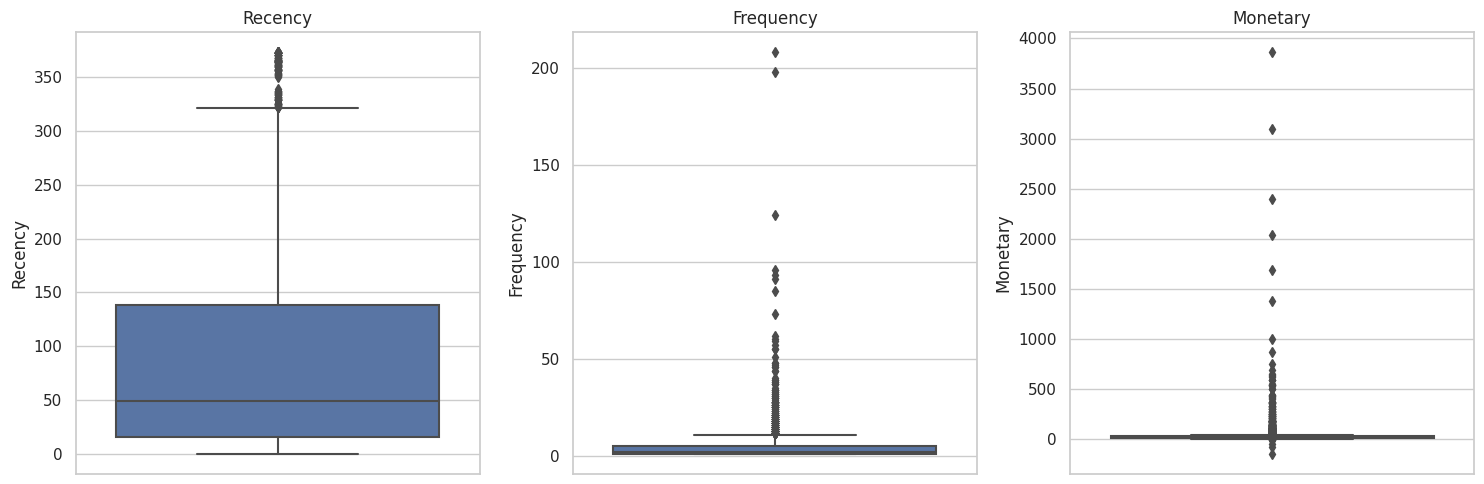

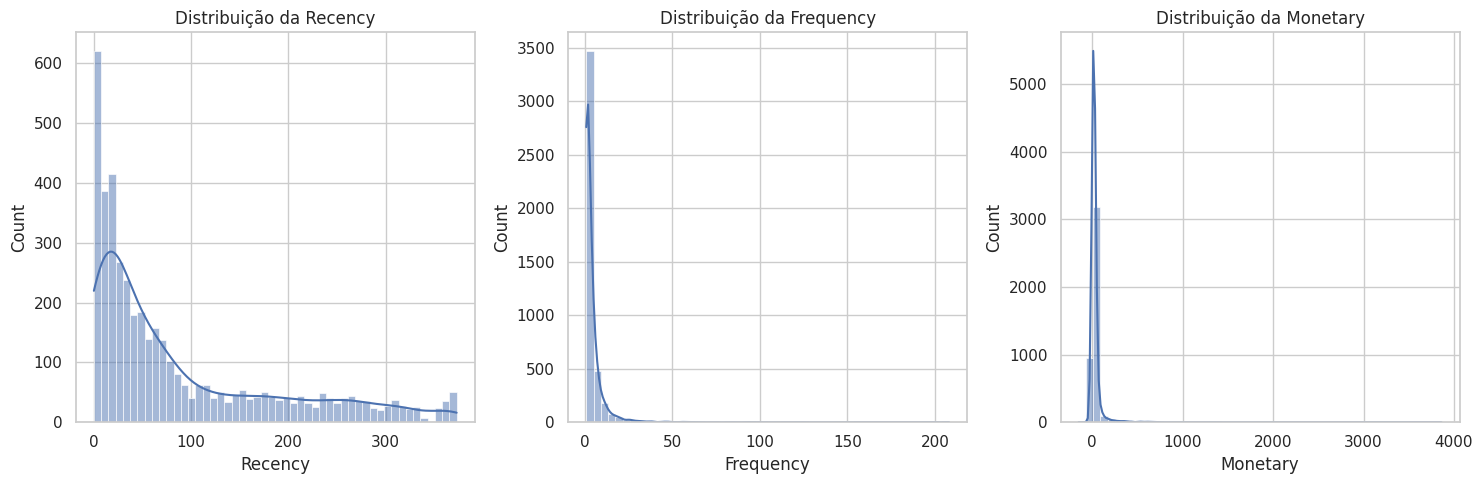

In [168]:
# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Boxplots das métricas RFM
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=rfm['Recency'])
plt.title('Recency')

plt.subplot(1, 3, 2)
sns.boxplot(y=rfm['Frequency'])
plt.title('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(y=rfm['Monetary'])
plt.title('Monetary')

plt.tight_layout()
plt.show()

# Histogramas das métricas RFM
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=50, kde=True)
plt.title('Distribuição da Recency')

plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=50, kde=True)
plt.title('Distribuição da Frequency')

plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], bins=50, kde=True)
plt.title('Distribuição da Monetary')

plt.tight_layout()
plt.show()


In [169]:
# Definir quantis para cada métrica
quantiles = rfm.quantile(q=[0.2, 0.4, 0.6, 0.8]).to_dict()

def r_score(x, p, d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]:
        return 2
    else:
        return 1

def fm_score(x, p, d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]:
        return 4
    else:
        return 5

# Aplicar as funções de pontuação
rfm['R_quartile'] = rfm['Recency'].apply(r_score, args=('Recency', quantiles))
rfm['F_quartile'] = rfm['Frequency'].apply(fm_score, args=('Frequency', quantiles))
rfm['M_quartile'] = rfm['Monetary'].apply(fm_score, args=('Monetary', quantiles))

# Combinar as pontuações para formar o RFM Score
rfm['RFM_Score'] = rfm['R_quartile'].astype(str) + rfm['F_quartile'].astype(str) + rfm['M_quartile'].astype(str)

# Exibir as primeiras linhas com as pontuações
print("Métricas RFM com pontuação:")
print(rfm.head())


Métricas RFM com pontuação:
   CustomerID  Recency  Frequency   Monetary  R_quartile  F_quartile  \
0       12347        1          7  23.681319           5           5   
1       12348       74          4  57.975484           2           4   
2       12349       18          1  24.076027           4           1   
3       12350      309          1  19.670588           1           1   
4       12352       35          7  20.605467           3           5   

   M_quartile RFM_Score  
0           4       554  
1           5       245  
2           4       414  
3           4       114  
4           4       354  


# Interpretação das Pontuações:

Recência (R): Clientes com menor recência (compras mais recentes) recebem pontuação mais alta (5).

Frequência (F): Clientes que compram mais frequentemente recebem pontuação mais alta (5).

Monetário (M): Clientes que gastam mais por compra recebem pontuação mais alta (5).

---

# Exemplo de Segmentação:


Segmento 555: Melhores clientes (alta recência, alta frequência, alto valor monetário).

Segmento 111: Clientes menos valiosos (baixa recência, baixa frequência, baixo valor monetário).

Outros segmentos: Variações intermediárias que representam diferentes níveis de engajamento e valor.

---
# Sugestões a seguir:

Analisar os Segmentos

Identifique quais segmentos têm maior potencial para campanhas específicas.
Desenvolva estratégias de marketing direcionadas para cada segmento.

In [176]:
# Salvar o DataFrame RFM com pontuações em um arquivo CSV
rfm.to_csv('rfm_output.csv', index=False)
print("Arquivo 'rfm_output.csv' salvo com sucesso!")


Arquivo 'rfm_output.csv' salvo com sucesso!
